In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
plt.rcParams['font.sans-serif'] = ['Georgia']

In [3]:
# Read csv file to retrieve data
data = pd.read_csv('https://www.dropbox.com/s/bnrjcorcmohnggn/All_Data_merge.csv?dl=1')
data = data[['session','Period','Subject','Group','ROLE','RECEIVERIDEAL','SENDERBIAS','MESSAGE','MESSAGEA','MESSAGEB', \
             'ACTION','TreatmentType','PROPOSAL','M1']]
data = data.rename(index = str, columns = {'M1':'M2'})

# Sort data
data['session'] = pd.factorize(data.session)[0]
data = data.sort_values(by = ['session','Period','Group'])

# Drop the first trial
data = data[data['Period'] != 0]

# Show the first five observations
data.head()

,session,Period,Subject,Group,ROLE,RECEIVERIDEAL,SENDERBIAS,MESSAGE,MESSAGEA,MESSAGEB,ACTION,TreatmentType,PROPOSAL,M2
18,0,1,1,1,2,87.086166,10.0,97.129951,97.129951,65.078674,77.783218,141,NaN,NaN
19,0,1,2,1,3,87.086166,-10.0,65.078674,97.129951,65.078674,77.783218,141,NaN,NaN
20,0,1,3,1,1,87.086166,0.0,-0.010000,97.129951,65.078674,77.783218,141,NaN,NaN
21,0,1,4,2,2,46.784309,10.0,56.847321,56.847321,33.901516,46.890442,141,NaN,NaN
22,0,1,5,2,3,46.784309,-10.0,33.901516,56.847321,33.901516,46.890442,141,NaN,NaN


In [4]:
# O-2 results
O2_10 = data[data['TreatmentType'] == 121].drop(columns = ['TreatmentType','PROPOSAL','MESSAGE','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O2_20 = data[data['TreatmentType'] == 122].drop(columns=['TreatmentType','PROPOSAL','MESSAGE','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O2_10_F = data[data['TreatmentType'] == 141].drop(columns=['TreatmentType','PROPOSAL','MESSAGE','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O2_20_F = data[data['TreatmentType'] == 142].drop(columns=['TreatmentType','PROPOSAL','MESSAGE','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
    
O2_10.head()


,session,Period,Group,RECEIVERIDEAL,MESSAGEA,MESSAGEB,ACTION
0,14,1,1,89.402603,99.388115,67.846733,81.839157
1,14,1,2,74.796249,73.819931,61.436481,69.400932
2,14,1,3,32.763309,51.165501,20.352564,34.993008
3,14,1,4,89.583511,100.000000,69.594986,85.759903
4,14,1,5,45.347065,70.104897,51.893940,60.004662


In [5]:
# O-1 results
O1_10 = data[data['TreatmentType']==111].drop(columns=['TreatmentType','MESSAGEA','MESSAGEB','PROPOSAL','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O1_20 = data[data['TreatmentType']==112].drop(columns=['TreatmentType','MESSAGEA','MESSAGEB','PROPOSAL','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O1_10_F = data[data['TreatmentType']==131].drop(columns=['TreatmentType','MESSAGEA','MESSAGEB','PROPOSAL','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)
O1_20_F = data[data['TreatmentType']==132].drop(columns=['TreatmentType','MESSAGEA','MESSAGEB','PROPOSAL','ROLE','SENDERBIAS','Subject','M2']).drop_duplicates().reset_index(drop=True)

O1_10.head()

,session,Period,Group,RECEIVERIDEAL,MESSAGE,ACTION
0,30,1,1,15.170968,25.043707,21.363636
1,30,1,2,38.490818,48.499416,42.657341
2,30,1,3,5.361189,10.300117,16.958042
3,30,1,4,85.766861,85.827507,75.882866
4,30,1,5,91.175941,96.148018,44.615383


In [6]:
# C-2 results
C2_10 = data[data['TreatmentType']==231].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
C2_20 = data[data['TreatmentType']==232].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
C2_10_F = data[data['TreatmentType']==241].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
C2_20_F = data[data['TreatmentType']==242].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
C2_10_I = data[data['TreatmentType']==221].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
C2_20_I = data[data['TreatmentType']==222].drop(columns=['TreatmentType','MESSAGE','MESSAGEA','MESSAGEB','ROLE','SENDERBIAS','Subject']).drop_duplicates().reset_index(drop=True)
    
C2_20.head()

,session,Period,Group,RECEIVERIDEAL,ACTION,PROPOSAL,M2
0,6,1,1,50.718487,80.812935,80.812935,69.065269
1,6,1,2,75.928513,90.832458,90.832458,59.192017
2,6,1,3,66.873878,72.329254,72.329254,56.705421
3,6,1,4,97.280106,100.000000,100.000000,84.789337
4,6,1,5,70.848167,99.974358,99.974358,60.874126


In [7]:
pd.crosstab(O2_10['session'], O2_10['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
14,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
15,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
16,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
17,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [8]:
pd.crosstab(O2_20['session'], O2_20['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
18,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
19,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
20,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
21,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [9]:
pd.crosstab(O1_10['session'], O1_10['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
30,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
31,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [10]:
pd.crosstab(O1_20['session'], O1_20['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
32,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
33,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [11]:
pd.crosstab(C2_10['session'], C2_10['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [12]:
pd.crosstab(C2_20['session'], C2_20['Period'])

Period,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
session,,,,,,,,,,,,,,,,,,,,,
6,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
9,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


## Figure 3: Relationship between State and Action: Treatments O-2

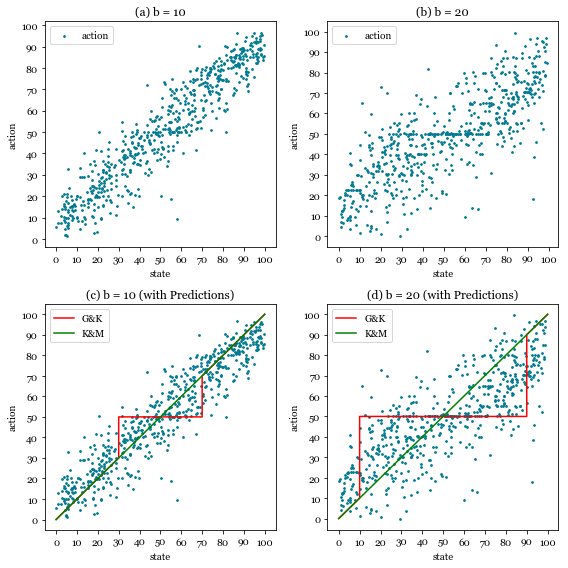

In [13]:
# GRADED FUNCTION: Reconstruct Figure 3 (≈4 lines)

# Set up number of subplots and figure size
fig2, axarr = plt.subplots(2, 2, figsize=(8,8))

# Set up the points needed for drawing predictions 
GK_10x = [0,30,30,70,70,100]
GK_10y = [0,30,50,50,70,100]
GK_20x = [0,10,10,90,90,100]
GK_20y = [0,10,50,50,90,100]
KMx = [0,100]
KMy = [0,100]

# Draw the predictions
axarr[1,0].plot(GK_10x, GK_10y, color='r', label='G&K')
axarr[1,1].plot(GK_20x, GK_20y, color='r', label='G&K')
axarr[1,0].plot(KMx, KMy, color='g', label='K&M')
axarr[1,1].plot(KMx, KMy, color='g', label='K&M')
axarr[1,0].legend()
axarr[1,1].legend()

ticksList = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Set up labels for all subplots
for i in range (0,2):
    for j in range (0,2):
        axarr[i,j].set_xlabel('state')
        axarr[i,j].set_ylabel('action')
        axarr[i,j].set_xticks(ticksList)
        axarr[i,j].set_yticks(ticksList)

# Draw the data points of O-2
axarr[0, 0].scatter(O2_10['RECEIVERIDEAL'], O2_10['ACTION'],
                    s = 3, c = 'xkcd:ocean', 
                    label = 'action')
axarr[0, 0].set_title('(a) b = 10')
axarr[0, 0].legend()

axarr[0, 1].scatter(O2_20['RECEIVERIDEAL'], O2_20['ACTION'],
                    s = 3, c = 'xkcd:ocean', 
                    label = 'action')
axarr[0, 1].set_title('(b) b = 20')
axarr[0, 1].legend()

axarr[1, 0].scatter(O2_10['RECEIVERIDEAL'], O2_10['ACTION'],
                    s = 3, c = 'xkcd:ocean', 
                    label = 'action')
axarr[1, 0].set_title('(c) b = 10 (with Predictions)')

axarr[1, 1].scatter(O2_20['RECEIVERIDEAL'], O2_20['ACTION'],
                    s = 3, c = 'xkcd:ocean',
                    label = 'action')
axarr[1, 1].set_title('(d) b = 20 (with Predictions)')

# Show Figure 3
plt.tight_layout()
plt.show()

### Findings of Figure 3
- 
- 

## Table 4: GLS Regression: Treatments O-2

In [14]:
# GRADED FUNCTION: Reconstruct Table 4-1 (≈2 lines)

# Put the state as X and action as y
X = O2_10['RECEIVERIDEAL']
X = sm.add_constant(X)
y = O2_10['ACTION']

# Do fixed GLS
model = sm.GLS(y, X)
result = model.fit()

# Show the result of parameters
print('b = 10')
result.summary2()

b = 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized least squares
==================================================================
Model:              GLS              Adj. R-squared:     0.882    
Dependent Variable: ACTION           AIC:                4310.8736
Date:               2019-06-09 15:16 BIC:                4319.6674
No. Observations:   600              Log-Likelihood:     -2153.4  
Df Model:           1                F-statistic:        4465.    
Df Residuals:       598              Prob (F-statistic): 1.41e-279
R-squared:          0.882            Scale:              76.983   
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const             7.2821    0.7501   9.7088  0.0000  5.8091  8.7552
RECEIVERIDEAL     0.8512    0.0127  66.8226  0.0000  0.8261  0.8762
------------------------------------------------------------------
Omnibus:               47.332       Durbin-Watson:          2.048 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       96.811
Skew:                  -0.475       Prob(JB):               0.000 
Kurtosis:              4.724        Condition No.:          123   
==================================================================

"""

In [15]:
# GRADED FUNCTION: Reconstruct Table 4-2 (≈2 lines)

O2_10['POOLING_INTERVAL'] = (O2_10['RECEIVERIDEAL']>=30) & (O2_10['RECEIVERIDEAL']<=70)
O2_10['POOLING_INTERVAL'] = O2_10['POOLING_INTERVAL'] * 1
O2_10['IDEALxPOOLING'] = O2_10['RECEIVERIDEAL'] * O2_10['POOLING_INTERVAL']

# Put the state as X and action as y
X = np.array(list(zip(O2_10['RECEIVERIDEAL'], 
                      O2_10['POOLING_INTERVAL'], 
                      O2_10['IDEALxPOOLING'])))
X = sm.add_constant(X)
y = np.array(O2_10['ACTION'])

# Do fixed GLS
model = sm.GLS(y, X, hasconst = True)
result = model.fit()

# Show the result of parameters
print('b = 10')
result.summary()

b = 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            GLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1484.
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          6.16e-276
Time:                        15:16:52   Log-Likelihood:                -2153.4
No. Observations:                 600   AIC:                             4315.
Df Residuals:                     596   BIC:                             4332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3407      0.840      8.743      0.000       5.692       8.990
x1             0.8504      0.013     64.295      0.000       0.824       0.876
x2            -0.5650      2.664     -0.212      0.832      -5.796       4.666
x3             0.0102      0.051      0.201      0.840      -0.089       0.110
==============================================================================
Omnibus:                       47.398   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.903
Skew:                          -0.475   Prob(JB):                     9.07e-22
Kurtosis:                       4.724   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# GRADED FUNCTION: Reconstruct Table 4-3 (≈2 lines)

# Put the state as X and action as y
X = O2_20['RECEIVERIDEAL']
y = O2_20['ACTION']

# Do fixed GLS
model = sm.GLS(y, X)
result = model.fit()

# Show the result of parameters
# Use "result.summary()" or "result.params" instead if your computer can't show
print('b = 20')
result.summary2()

b = 20


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized least squares
==================================================================
Model:              GLS              Adj. R-squared:     0.911    
Dependent Variable: ACTION           AIC:                5023.1819
Date:               2019-06-09 15:16 BIC:                5027.5789
No. Observations:   600              Log-Likelihood:     -2510.6  
Df Model:           1                F-statistic:        6115.    
Df Residuals:       599              Prob (F-statistic): 1.55e-316
R-squared:          0.911            Scale:              252.76   
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
RECEIVERIDEAL     0.8724    0.0112  78.1990  0.0000  0.8505  0.8944
------------------------------------------------------------------
Omnibus:               10.688       Durbin-Watson:          1.937 
Prob(Omnibus):         0.005        Jarque-Bera (JB):       16.113
Skew:                  -0.123       Prob(JB):               0.000 
Kurtosis:              3.764        Condition No.:          1     
==================================================================

"""

In [17]:
# GRADED FUNCTION: Reconstruct Table 4-4 (≈2 lines)

# Generate variables that would be used in the regression
O2_20['POOLING_INTERVAL'] = (O2_20['RECEIVERIDEAL']>=10) & (O2_20['RECEIVERIDEAL']<=90)
O2_20['POOLING_INTERVAL'] = O2_20['POOLING_INTERVAL']*1
O2_20['IDEALxPOOLING'] = O2_20['RECEIVERIDEAL'] * O2_20['POOLING_INTERVAL']

# Set up independent and dependent variables
X = np.array(list(zip(O2_20['RECEIVERIDEAL'], 
                      O2_20['POOLING_INTERVAL'], 
                      O2_20['IDEALxPOOLING'])))
X = sm.add_constant(X)
y = np.array(O2_20['ACTION'])

# Do fixed GLS
model = sm.GLS(y, X, hasconst = True)
result = model.fit()

# Show the result of parameters
print('b = 20')
result.summary()

b = 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.625
Model:                            GLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     331.8
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          1.23e-126
Time:                        15:16:52   Log-Likelihood:                -2399.4
No. Observations:                 600   AIC:                             4807.
Df Residuals:                     596   BIC:                             4824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2422      2.037      6.991      0.000      10.241      18.243
x1             0.6609      0.029     22.493      0.000       0.603       0.719
x2             6.0294      2.476      2.436      0.015       1.167      10.891
x3            -0.1016      0.039     -2.621      0.009      -0.178      -0.025
==============================================================================
Omnibus:                       18.526   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.198
Skew:                          -0.255   Prob(JB):                     7.53e-07
Kurtosis:                       3.932   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""